In [ ]:
pip install requests pandas

In [ ]:
import requests
import pandas as pd
from datetime import datetime, timedelta

# Define the API URL for historical market chart data
url = 'https://api.coingecko.com/api/v3/coins/{id}/market_chart'

# Define your cryptocurrencies and the number of days you want historical data for
cryptocurrencies = ['bitcoin', 'ethereum', 'litecoin']
days = 365  # Number of days of historical data you want to fetch

# Create an empty DataFrame to store the data
all_data = []

# Loop through each cryptocurrency to fetch historical data
for crypto in cryptocurrencies:
    parameters = {
        'vs_currency': 'usd',
        'days': days,  # Number of days for historical data
    }

    # Make the API request
    response = requests.get(url.format(id=crypto), params=parameters)

    # Check if the request was successful
    if response.status_code == 200:
        # Print the response JSON
        print(f"Fetching data for {crypto}...")
        data = response.json()

        # Extract prices and timestamps
        prices = data['prices']  # List of [timestamp, price] pairs
        for price in prices:
            timestamp, price_value = price
            date = datetime.fromtimestamp(timestamp / 1000)  # Convert to datetime
            all_data.append({'Cryptocurrency': crypto, 'Date': date, 'Price (USD)': price_value})
    else:
        # Print the error message
        print(f"Error fetching data for {crypto}: {response.status_code}, {response.json()}")

# Create a DataFrame from the aggregated data
df = pd.DataFrame(all_data)

# Save the DataFrame to an Excel file
excel_filename = "cryptocurrency_historical_prices.xlsx"
df.to_excel(excel_filename, index=False)  # Save to Excel without the index
print(f"Data saved to {excel_filename}")


Fetching data for bitcoin...
Fetching data for ethereum...
Fetching data for litecoin...
Data saved to cryptocurrency_historical_prices.xlsx


In [ ]:
import requests

# Define the API URL for demo access
url = 'https://api.coingecko.com/api/v3/simple/price'  # Use the public API URL for demo keys

# Your API key
api_key = 'CG-fERL7LXFuG4nQzGZvrBCFRta'  # Make sure this is correct

# Set up the headers with your API key
headers = {
    'Accept': 'application/json',
    'X-CoinGecko-API-Key': api_key  # Include your API key here
}

# Define the parameters for the request for multiple cryptocurrencies
parameters = {
    'ids': 'bitcoin,ethereum,litecoin',  # Fetching prices for multiple coins
    'vs_currencies': 'usd'                 # Currency you want the prices in
}

# Make the API request
response = requests.get(url, headers=headers, params=parameters)

# Check if the request was successful
if response.status_code == 200:
    # Print the response JSON
    print("Current Cryptocurrency Prices:")
    print(response.json())
else:
    # Print the error message
    print(f"Error: {response.status_code}, {response.json()}")


Current Cryptocurrency Prices:
{'bitcoin': {'usd': 67769}, 'ethereum': {'usd': 2500.16}, 'litecoin': {'usd': 70.76}}


In [ ]:
import requests
import pandas as pd
from datetime import datetime

def fetch_crypto_data(crypto_pair: str, start_date: str):
    # Map crypto pairs to CoinGecko IDs
    crypto_map = {
        "BTC/USD": "bitcoin",
        "ETH/USD": "ethereum",
        "LTC/USD": "litecoin",
    }

    if crypto_pair not in crypto_map:
        raise ValueError("Unsupported crypto pair. Supported pairs: BTC/USD, ETH/USD, LTC/USD.")

    crypto_id = crypto_map[crypto_pair]

    # Convert start date to timestamp
    start_timestamp = int(datetime.strptime(start_date, "%Y-%m-%d").timestamp())

    # API request for historical data
    url = f"https://api.coingecko.com/api/v3/coins/{crypto_id}/market_chart/range"
    end_date = int(datetime.now().timestamp())

    params = {
        "vs_currency": "usd",
        "days": "max",  # max to get all historical data
        "from": start_timestamp,
        "to": end_date
    }

    response = requests.get(url, params=params)

    if response.status_code != 200:
        print(f"Error: {response.status_code}, {response.json()}")
        return None

    # Process response
    prices = response.json()['prices']

    # Create DataFrame
    df = pd.DataFrame(prices, columns=['timestamp', 'close'])
    df['date'] = pd.to_datetime(df['timestamp'], unit='ms')
    df['open'] = df['close'].shift(1)  # Assuming open of today is close of yesterday
    df['high'] = df['close'].rolling(window=1).max()  # For simplicity
    df['low'] = df['close'].rolling(window=1).min()  # For simplicity
    df.dropna(inplace=True)  # Drop rows with NaN values

    return df[['date', 'open', 'high', 'low', 'close']]

# Fetch data for BTC/USD starting from January 1, 2024
crypto_data = fetch_crypto_data("BTC/USD", "2024-01-01")

# Display the fetched data
if crypto_data is not None:
    print(crypto_data.head())  # Show the first few rows of the DataFrame


        date          open          high           low         close
1 2024-01-02  42208.202176  44168.681187  44168.681187  44168.681187
2 2024-01-03  44168.681187  44994.673887  44994.673887  44994.673887
3 2024-01-04  44994.673887  42821.558989  42821.558989  42821.558989
4 2024-01-05  42821.558989  44195.578562  44195.578562  44195.578562
5 2024-01-06  44195.578562  44113.699734  44113.699734  44113.699734


In [ ]:
crypto_data


,date,open,high,low,close
1,2024-01-02,42208.202176,44168.681187,44168.681187,44168.681187
2,2024-01-03,44168.681187,44994.673887,44994.673887,44994.673887
3,2024-01-04,44994.673887,42821.558989,42821.558989,42821.558989
4,2024-01-05,42821.558989,44195.578562,44195.578562,44195.578562
5,2024-01-06,44195.578562,44113.699734,44113.699734,44113.699734
...,...,...,...,...,...
296,2024-10-23,67394.857757,67351.047935,67351.047935,67351.047935
297,2024-10-24,67351.047935,66683.968065,66683.968065,66683.968065
298,2024-10-25,66683.968065,68214.052052,68214.052052,68214.052052
299,2024-10-26,68214.052052,66585.665355,66585.665355,66585.665355


In [ ]:
print(crypto_data.tail(10))  # Print the last 10 rows to see if values appear


          date          open          high           low         close
291 2024-10-18  67647.544148  67328.105270  67328.105270  67328.105270
292 2024-10-19  67328.105270  68465.619207  68465.619207  68465.619207
293 2024-10-20  68465.619207  68388.871290  68388.871290  68388.871290
294 2024-10-21  68388.871290  68962.829180  68962.829180  68962.829180
295 2024-10-22  68962.829180  67394.857757  67394.857757  67394.857757
296 2024-10-23  67394.857757  67351.047935  67351.047935  67351.047935
297 2024-10-24  67351.047935  66683.968065  66683.968065  66683.968065
298 2024-10-25  66683.968065  68214.052052  68214.052052  68214.052052
299 2024-10-26  68214.052052  66585.665355  66585.665355  66585.665355
300 2024-10-27  66585.665355  67018.165017  67018.165017  67018.165017


In [ ]:
# Check for duplicates in the 'date' column
duplicate_dates = crypto_data[crypto_data.duplicated(subset='date', keep=False)]
print(duplicate_dates)


Empty DataFrame
Columns: [date, open, high, low, close]
Index: []


In [ ]:
# Remove duplicates by keeping the first occurrence
crypto_data = crypto_data.drop_duplicates(subset='date').reset_index(drop=True)


In [ ]:
# Display the first few rows of the original DataFrame
print(crypto_data.head(10))

# Check the shape of the DataFrame
print("\n Shape of data ->" , crypto_data.shape)


        date          open          high           low         close
0 2024-01-02  42208.202176  44168.681187  44168.681187  44168.681187
1 2024-01-03  44168.681187  44994.673887  44994.673887  44994.673887
2 2024-01-04  44994.673887  42821.558989  42821.558989  42821.558989
3 2024-01-05  42821.558989  44195.578562  44195.578562  44195.578562
4 2024-01-06  44195.578562  44113.699734  44113.699734  44113.699734
5 2024-01-07  44113.699734  43956.120717  43956.120717  43956.120717
6 2024-01-08  43956.120717  43883.743879  43883.743879  43883.743879
7 2024-01-09  43883.743879  46936.185561  46936.185561  46936.185561
8 2024-01-10  46936.185561  46105.946078  46105.946078  46105.946078
9 2024-01-11  46105.946078  46632.313148  46632.313148  46632.313148

 Shape of data -> (300, 5)


In [ ]:
# Count unique dates
unique_dates_count = crypto_data['date'].nunique()
print(f"Number of unique dates: {unique_dates_count}")

# Check for any duplicates
duplicate_count = crypto_data['date'].duplicated().sum()
print(f"Number of duplicate dates: {duplicate_count}")


Number of unique dates: 300
Number of duplicate dates: 0


In [ ]:
def calculate_metrics(data: pd.DataFrame, variable1: int, variable2: int) -> pd.DataFrame:
    # Ensure date column is in datetime format
    data['date'] = pd.to_datetime(data['date'])

    # Sort data by date to maintain chronological order
    data = data.sort_values(by='date').reset_index(drop=True)

    # Calculate Historical High Price
    data[f'High_Last_{variable1}_Days'] = data['high'].rolling(window=variable1, min_periods=1).max()

    # Calculate Days Since Last High
    data[f'Days_Since_High_Last_{variable1}_Days'] = (
        data['date'] - data['date'].where(data['high'] == data[f'High_Last_{variable1}_Days']).ffill()
    ).dt.days

    # Calculate % Difference from Historical High
    data[f'%_Diff_From_High_Last_{variable1}_Days'] = (
        (data['close'] - data[f'High_Last_{variable1}_Days']) / data[f'High_Last_{variable1}_Days'] * 100
    )

    # Calculate Historical Low Price
    data[f'Low_Last_{variable1}_Days'] = data['low'].rolling(window=variable1, min_periods=1).min()

    # Calculate Days Since Last Low
    data[f'Days_Since_Low_Last_{variable1}_Days'] = (
        data['date'] - data['date'].where(data['low'] == data[f'Low_Last_{variable1}_Days']).ffill()
    ).dt.days

    # Calculate % Difference from Historical Low
    data[f'%_Diff_From_Low_Last_{variable1}_Days'] = (
        (data['close'] - data[f'Low_Last_{variable1}_Days']) / data[f'Low_Last_{variable1}_Days'] * 100
    )

    # Calculate Future High Price
    data[f'High_Next_{variable2}_Days'] = data['high'].shift(-variable2).rolling(window=variable2, min_periods=1).max()

    # Calculate % Difference from Future High
    data[f'%_Diff_From_High_Next_{variable2}_Days'] = (
        (data['close'] - data[f'High_Next_{variable2}_Days']) / data[f'High_Next_{variable2}_Days'] * 100
    )

    # Calculate Future Low Price
    data[f'Low_Next_{variable2}_Days'] = data['low'].shift(-variable2).rolling(window=variable2, min_periods=1).min()

    # Calculate % Difference from Future Low
    data[f'%_Diff_From_Low_Next_{variable2}_Days'] = (
        (data['close'] - data[f'Low_Next_{variable2}_Days']) / data[f'Low_Next_{variable2}_Days'] * 100
    )

    # Fill any NaN values if required
    data.fillna(method='ffill', inplace=True)

    return data


In [ ]:
# Calculate metrics again
if crypto_data is not None:
    crypto_data_with_metrics = calculate_metrics(crypto_data, variable1=7, variable2=7)  # Example with a 7-day window
    print(crypto_data_with_metrics.head(1))  # Display the first row of the DataFrame with new metrics


        date          open          high           low         close  \
0 2024-01-02  42208.202176  44168.681187  44168.681187  44168.681187   

   High_Last_7_Days  Days_Since_High_Last_7_Days  \
0      44168.681187                            0   

   %_Diff_From_High_Last_7_Days  Low_Last_7_Days  Days_Since_Low_Last_7_Days  \
0                           0.0     44168.681187                           0   

   %_Diff_From_Low_Last_7_Days  High_Next_7_Days  \
0                          0.0      46936.185561   

   %_Diff_From_High_Next_7_Days  Low_Next_7_Days  %_Diff_From_Low_Next_7_Days  
0                     -5.896313     46936.185561                    -5.896313  


<ipython-input-14-fbc678c23605>:51: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [ ]:
crypto_data_with_metrics

,date,open,high,low,close,High_Last_7_Days,Days_Since_High_Last_7_Days,%_Diff_From_High_Last_7_Days,Low_Last_7_Days,Days_Since_Low_Last_7_Days,%_Diff_From_Low_Last_7_Days,High_Next_7_Days,%_Diff_From_High_Next_7_Days,Low_Next_7_Days,%_Diff_From_Low_Next_7_Days
0,2024-01-02,42208.202176,44168.681187,44168.681187,44168.681187,44168.681187,0,0.000000,44168.681187,0,0.000000,46936.185561,-5.896313,46936.185561,-5.896313
1,2024-01-03,44168.681187,44994.673887,44994.673887,44994.673887,44994.673887,0,0.000000,44168.681187,1,1.870087,46936.185561,-4.136492,46105.946078,-2.410258
2,2024-01-04,44994.673887,42821.558989,42821.558989,42821.558989,44994.673887,1,-4.829716,42821.558989,0,0.000000,46936.185561,-8.766427,46105.946078,-7.123565
3,2024-01-05,42821.558989,44195.578562,44195.578562,44195.578562,44994.673887,2,-1.775978,42821.558989,1,3.208710,46936.185561,-5.839007,46105.946078,-4.143430
4,2024-01-06,44195.578562,44113.699734,44113.699734,44113.699734,44994.673887,3,-1.957952,42821.558989,2,3.017500,46936.185561,-6.013454,42893.929606,2.843689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2024-10-23,67394.857757,67351.047935,67351.047935,67351.047935,68962.829180,2,-2.337174,67328.105270,12,0.034076,68214.052052,-1.265141,66585.665355,1.149470
296,2024-10-24,67351.047935,66683.968065,66683.968065,66683.968065,68962.829180,3,-3.304477,66683.968065,0,0.000000,68214.052052,-2.243063,66585.665355,0.147633
297,2024-10-25,66683.968065,68214.052052,68214.052052,68214.052052,68962.829180,4,-1.085769,66683.968065,1,2.294531,67018.165017,1.784422,66585.665355,2.445551
298,2024-10-26,68214.052052,66585.665355,66585.665355,66585.665355,68962.829180,5,-3.447022,66585.665355,0,0.000000,67018.165017,-0.645347,67018.165017,-0.645347


In [ ]:
crypto_data_with_metrics.describe()

,date,open,high,low,close,High_Last_7_Days,Days_Since_High_Last_7_Days,%_Diff_From_High_Last_7_Days,Low_Last_7_Days,Days_Since_Low_Last_7_Days,%_Diff_From_Low_Last_7_Days,High_Next_7_Days,%_Diff_From_High_Next_7_Days,Low_Next_7_Days,%_Diff_From_Low_Next_7_Days
count,300,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,2024-05-30 12:00:00,60418.361344,60501.061220,60501.061220,60501.061220,62408.919123,4.753333,-2.995804,58009.224879,6.606667,4.398245,62941.499052,-3.864327,58597.101271,3.280260
min,2024-01-02 00:00:00,39504.730058,39504.730058,39504.730058,39504.730058,41626.107110,0.000000,-18.518521,39504.730058,0.000000,0.000000,41626.107110,-20.104310,39504.730058,-7.123565
25%,2024-03-16 18:00:00,57594.222343,57624.150570,57624.150570,57624.150570,60512.087575,1.000000,-4.571416,53956.261842,1.000000,0.523338,60620.627473,-7.162504,55880.375378,-0.131079
50%,2024-05-30 12:00:00,62824.677978,62834.437211,62834.437211,62834.437211,64334.142749,3.000000,-1.944659,60317.096979,4.000000,3.165019,65022.867784,-3.107639,60626.355124,2.391472
75%,2024-08-13 06:00:00,66692.240847,66717.817954,66717.817954,66717.817954,68425.415656,8.000000,-0.097467,63966.881374,10.000000,7.407162,68425.415656,-0.335159,64404.825489,6.090700
max,2024-10-27 00:00:00,73097.767027,73097.767027,73097.767027,73097.767027,73097.767027,24.000000,0.000000,69435.750403,30.000000,23.047309,73097.767027,7.338356,69435.750403,23.748975
std,NaN,8441.749746,8384.085542,8384.085542,8384.085542,8625.259833,5.025602,3.336896,8107.290989,6.928586,4.529913,8220.485149,4.712849,7808.318456,5.096050


In [ ]:
# Save DataFrame to Excel
file_path = 'crypto_data_with_metrics.xlsx'  # Specify your desired file path
crypto_data_with_metrics.to_excel(file_path, index=False)  # Save to Excel without row index

print(f"Data saved to {file_path}")

In [ ]:
crypto_data_with_metrics.columns

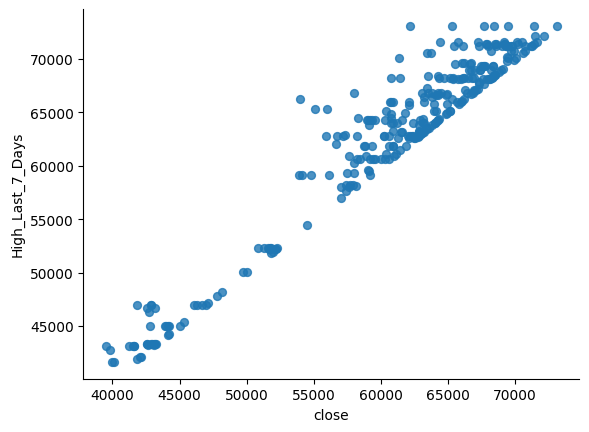

In [ ]:
# @title close vs High_Last_7_Days

from matplotlib import pyplot as plt
crypto_data_with_metrics.plot(kind='scatter', x='close', y='High_Last_7_Days', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

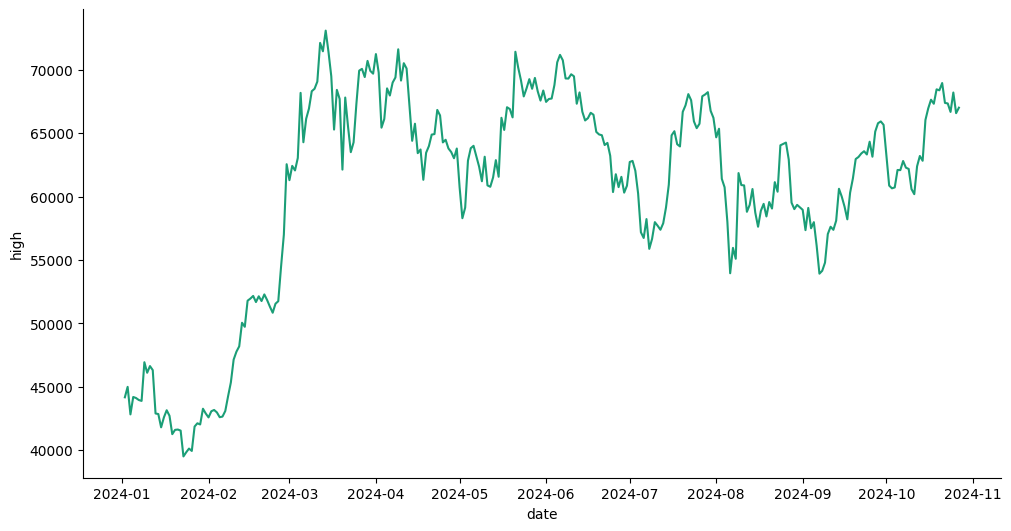

In [ ]:
# @title date vs high

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['high']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = crypto_data_with_metrics.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('high')

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have already loaded your data into 'crypto_data_with_metrics'
# Check the columns in your DataFrame
print(crypto_data_with_metrics.columns)

# Set variable1 and variable2
variable1 = 7  # For lookback period
variable2 = 7  # For future prediction period

# Define target and feature columns
target_high = f"%_Diff_From_High_Next_{variable2}_Days"
target_low = f"%_Diff_From_Low_Next_{variable2}_Days"

feature_columns = [
    f"Days_Since_High_Last_{variable1}_Days",
    f"%_Diff_From_High_Last_{variable1}_Days",
    f"Days_Since_Low_Last_{variable1}_Days",
    f"%_Diff_From_Low_Last_{variable1}_Days"
]

# Check if the columns are present in the DataFrame
for col in feature_columns + [target_high, target_low]:
    if col not in crypto_data_with_metrics.columns:
        raise ValueError(f"Column '{col}' is missing from the data.")

# Split the data into features (X) and targets (y)
X = crypto_data_with_metrics[feature_columns]
y_high = crypto_data_with_metrics[target_high]
y_low = crypto_data_with_metrics[target_low]

# Split data into training and testing sets
X_train, X_test, y_train_high, y_test_high = train_test_split(X, y_high, test_size=0.2, random_state=42)
X_train, X_test, y_train_low, y_test_low = train_test_split(X, y_low, test_size=0.2, random_state=42)

# Create and train the model for predicting high
model_high = RandomForestRegressor(random_state=42)
model_high.fit(X_train, y_train_high)

# Create and train the model for predicting low
model_low = RandomForestRegressor(random_state=42)
model_low.fit(X_train, y_train_low)

# Make predictions on the test set
predictions_high = model_high.predict(X_test)
predictions_low = model_low.predict(X_test)

# Evaluate the models
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, r2

mse_high, r2_high = evaluate_model(y_test_high, predictions_high)
mse_low, r2_low = evaluate_model(y_test_low, predictions_low)

# Output the evaluation metrics
print(f"High Prediction - Mean Squared Error: {mse_high}, R²: {r2_high}")
print(f"Low Prediction - Mean Squared Error: {mse_low}, R²: {r2_low}")

# Optionally, display the first few predictions for inspection
predictions_df = pd.DataFrame({
    'Actual_High': y_test_high,
    'Predicted_High': predictions_high,
    'Actual_Low': y_test_low,
    'Predicted_Low': predictions_low
})

print(predictions_df.head())


Index(['date', 'open', 'high', 'low', 'close', 'High_Last_7_Days',
       'Days_Since_High_Last_7_Days', '%_Diff_From_High_Last_7_Days',
       'Low_Last_7_Days', 'Days_Since_Low_Last_7_Days',
       '%_Diff_From_Low_Last_7_Days', 'High_Next_7_Days',
       '%_Diff_From_High_Next_7_Days', 'Low_Next_7_Days',
       '%_Diff_From_Low_Next_7_Days'],
      dtype='object')
High Prediction - Mean Squared Error: 19.034735449940495, R²: 0.03730555582879036
Low Prediction - Mean Squared Error: 26.987708947520467, R²: 0.03312978777051645
     Actual_High  Predicted_High  Actual_Low  Predicted_Low
203    -0.929826       -4.793219    3.370121       1.365985
266    -3.954070       -6.184821    0.277311       2.104289
152    -4.889081       -3.156198   -0.052687       1.569912
9       0.686521       -4.175541   11.558068      -0.268522
233    -4.856592       -7.368693    3.608202      -1.375420


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Assuming `crypto_data_with_metrics` is your DataFrame
# Feature Engineering
crypto_data_with_metrics['7_day_MA_Close'] = crypto_data_with_metrics['close'].rolling(window=7).mean()
crypto_data_with_metrics['Volatility'] = crypto_data_with_metrics['close'].rolling(window=7).std()

# Define your features and targets
feature_columns = [
    'Days_Since_High_Last_7_Days',
    '%_Diff_From_High_Last_7_Days',
    'Days_Since_Low_Last_7_Days',
    '%_Diff_From_Low_Last_7_Days',
    '7_day_MA_Close',
    'Volatility'
]

target_high = '%_Diff_From_High_Next_7_Days'
target_low = '%_Diff_From_Low_Next_7_Days'

# Split the data
X = crypto_data_with_metrics[feature_columns]
y_high = crypto_data_with_metrics[target_high]
y_low = crypto_data_with_metrics[target_low]

X_train, X_test, y_train_high, y_test_high = train_test_split(X, y_high, test_size=0.2, random_state=42)
X_train, X_test, y_train_low, y_test_low = train_test_split(X, y_low, test_size=0.2, random_state=42)

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search_high = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
grid_search_low = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)

# Train the models
grid_search_high.fit(X_train, y_train_high)
grid_search_low.fit(X_train, y_train_low)

# Predict and evaluate
y_pred_high = grid_search_high.predict(X_test)
y_pred_low = grid_search_low.predict(X_test)

# Evaluation metrics
mse_high = mean_squared_error(y_test_high, y_pred_high)
r2_high = r2_score(y_test_high, y_pred_high)
mse_low = mean_squared_error(y_test_low, y_pred_low)
r2_low = r2_score(y_test_low, y_pred_low)

print(f"High Prediction - MSE: {mse_high}, R²: {r2_high}")
print(f"Low Prediction - MSE: {mse_low}, R²: {r2_low}")


High Prediction - MSE: 12.494119305308638, R²: 0.36810158083544664
Low Prediction - MSE: 20.66020582100207, R²: 0.2598209197490111


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

# Load your data
# crypto_data_with_metrics = pd.read_csv('your_data.csv')

# Define your target variables
target_high = '%_Diff_From_High_Next_7_Days'
target_low = '%_Diff_From_Low_Next_7_Days'

# Define your feature variables
feature_columns = [
    'Days_Since_High_Last_7_Days',
    '%_Diff_From_High_Last_7_Days',
    'Days_Since_Low_Last_7_Days',
    '%_Diff_From_Low_Last_7_Days'
]

# Check if all columns exist
for col in feature_columns + [target_high, target_low]:
    if col not in crypto_data_with_metrics.columns:
        raise ValueError(f"Column '{col}' is missing from the data.")

# Split data into features (X) and targets (y)
X = crypto_data_with_metrics[feature_columns]
y_high = crypto_data_with_metrics[target_high]
y_low = crypto_data_with_metrics[target_low]

# Polynomial Feature Transformation (Optional)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train_high, y_test_high = train_test_split(X_poly, y_high, test_size=0.2, random_state=42)
X_train, X_test, y_train_low, y_test_low = train_test_split(X_poly, y_low, test_size=0.2, random_state=42)

# Set up K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the model
model = RandomForestRegressor()

# Set up Grid Search for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(model, param_grid, cv=kf, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train_high)

# Get the best model
best_model_high = grid_search.best_estimator_

# Predict and evaluate on high target
y_pred_high = best_model_high.predict(X_test)
mse_high = mean_squared_error(y_test_high, y_pred_high)
r2_high = r2_score(y_test_high, y_pred_high)

print(f"High Prediction - MSE: {mse_high}, R²: {r2_high}")

# For Low Prediction using the same model or another
grid_search.fit(X_train, y_train_low)
best_model_low = grid_search.best_estimator_

# Predict and evaluate on low target
y_pred_low = best_model_low.predict(X_test)
mse_low = mean_squared_error(y_test_low, y_pred_low)
r2_low = r2_score(y_test_low, y_pred_low)

print(f"Low Prediction - MSE: {mse_low}, R²: {r2_low}")

# Optionally display actual vs predicted
results = pd.DataFrame({
    'Actual_High': y_test_high,
    'Predicted_High': y_pred_high,
    'Actual_Low': y_test_low,
    'Predicted_Low': y_pred_low
})

print(results.head())


High Prediction - MSE: 17.67095779911897, R²: 0.10627952034663446
Low Prediction - MSE: 26.33852157374294, R²: 0.05638778032859337
     Actual_High  Predicted_High  Actual_Low  Predicted_Low
203    -0.929826       -2.528026    3.370121       3.932663
266    -3.954070       -2.919213    0.277311       3.588184
152    -4.889081       -4.377300   -0.052687       1.410557
9       0.686521       -3.582290   11.558068       1.158887
233    -4.856592       -6.110000    3.608202      -0.520843


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load your data (assuming 'crypto_data_with_metrics' is your DataFrame)
# crypto_data_with_metrics = pd.read_csv('path_to_your_data.csv')

# Define the feature and target variables
feature_columns = [
    'Days_Since_High_Last_7_Days',
    '%_Diff_From_High_Last_7_Days',
    'Days_Since_Low_Last_7_Days',
    '%_Diff_From_Low_Last_7_Days',
    '7_day_MA_Close',       # New Feature
    'Volatility'            # New Feature
]

target_high = '%_Diff_From_High_Next_7_Days'
target_low = '%_Diff_From_Low_Next_7_Days'

# Ensure all necessary columns are present
for col in feature_columns + [target_high, target_low]:
    if col not in crypto_data_with_metrics.columns:
        raise ValueError(f"Column '{col}' is missing from the data.")

# Split data into features (X) and targets (y)
X = crypto_data_with_metrics[feature_columns]
y_high = crypto_data_with_metrics[target_high]
y_low = crypto_data_with_metrics[target_low]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train_high, y_test_high = train_test_split(X_scaled, y_high, test_size=0.2, random_state=42)
X_train, X_test, y_train_low, y_test_low = train_test_split(X_scaled, y_low, test_size=0.2, random_state=42)

# Initialize the model
model_high = RandomForestRegressor(random_state=42)
model_low = RandomForestRegressor(random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_high = GridSearchCV(estimator=model_high, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_low = GridSearchCV(estimator=model_low, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the models
grid_search_high.fit(X_train, y_train_high)
grid_search_low.fit(X_train, y_train_low)

# Best models
best_model_high = grid_search_high.best_estimator_
best_model_low = grid_search_low.best_estimator_

# Predictions
y_pred_high = best_model_high.predict(X_test)
y_pred_low = best_model_low.predict(X_test)

# Evaluate the models
mse_high = mean_squared_error(y_test_high, y_pred_high)
r2_high = r2_score(y_test_high, y_pred_high)

mse_low = mean_squared_error(y_test_low, y_pred_low)
r2_low = r2_score(y_test_low, y_pred_low)

# Print results
print(f"High Prediction - MSE: {mse_high}, R²: {r2_high}")
print(f"Low Prediction - MSE: {mse_low}, R²: {r2_low}")

# Create a DataFrame to compare actual and predicted values
results = pd.DataFrame({
    'Actual_High': y_test_high,
    'Predicted_High': y_pred_high,
    'Actual_Low': y_test_low,
    'Predicted_Low': y_pred_low
})

print(results.head())


High Prediction - MSE: 13.25340406198229, R²: 0.32970024771915707
Low Prediction - MSE: 21.42980183223087, R²: 0.23224912919225404
     Actual_High  Predicted_High  Actual_Low  Predicted_Low
203    -0.929826       -2.760664    3.370121       3.278767
266    -3.954070       -4.954984    0.277311       1.316061
152    -4.889081       -4.410573   -0.052687       0.384965
9       0.686521       -0.980556   11.558068       1.971376
233    -4.856592       -5.444566    3.608202      -0.390487


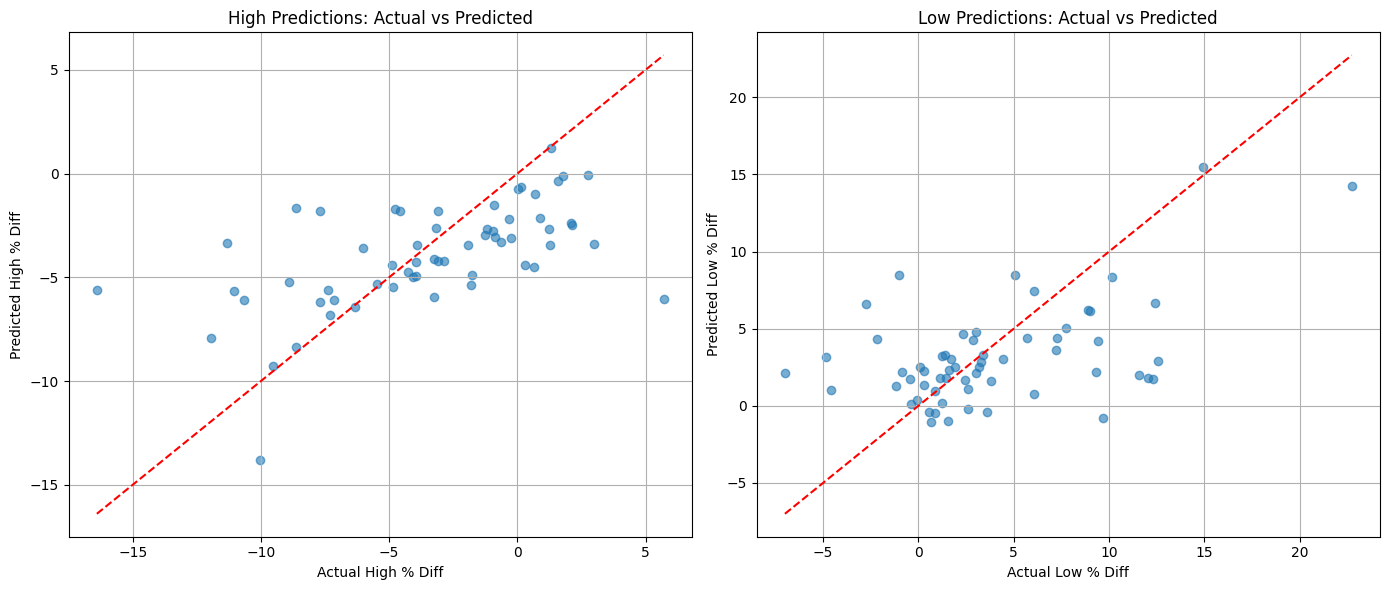

In [ ]:
# Scatter plot for High Predictions
plt.figure(figsize=(14, 6))

# High Predictions
plt.subplot(1, 2, 1)
plt.scatter(y_test_high, y_pred_high, alpha=0.6)
plt.plot([y_test_high.min(), y_test_high.max()], [y_test_high.min(), y_test_high.max()], 'r--')
plt.title('High Predictions: Actual vs Predicted')
plt.xlabel('Actual High % Diff')
plt.ylabel('Predicted High % Diff')
plt.grid()

# Low Predictions
plt.subplot(1, 2, 2)
plt.scatter(y_test_low, y_pred_low, alpha=0.6)
plt.plot([y_test_low.min(), y_test_low.max()], [y_test_low.min(), y_test_low.max()], 'r--')
plt.title('Low Predictions: Actual vs Predicted')
plt.xlabel('Actual Low % Diff')
plt.ylabel('Predicted Low % Diff')
plt.grid()

plt.tight_layout()
plt.show()


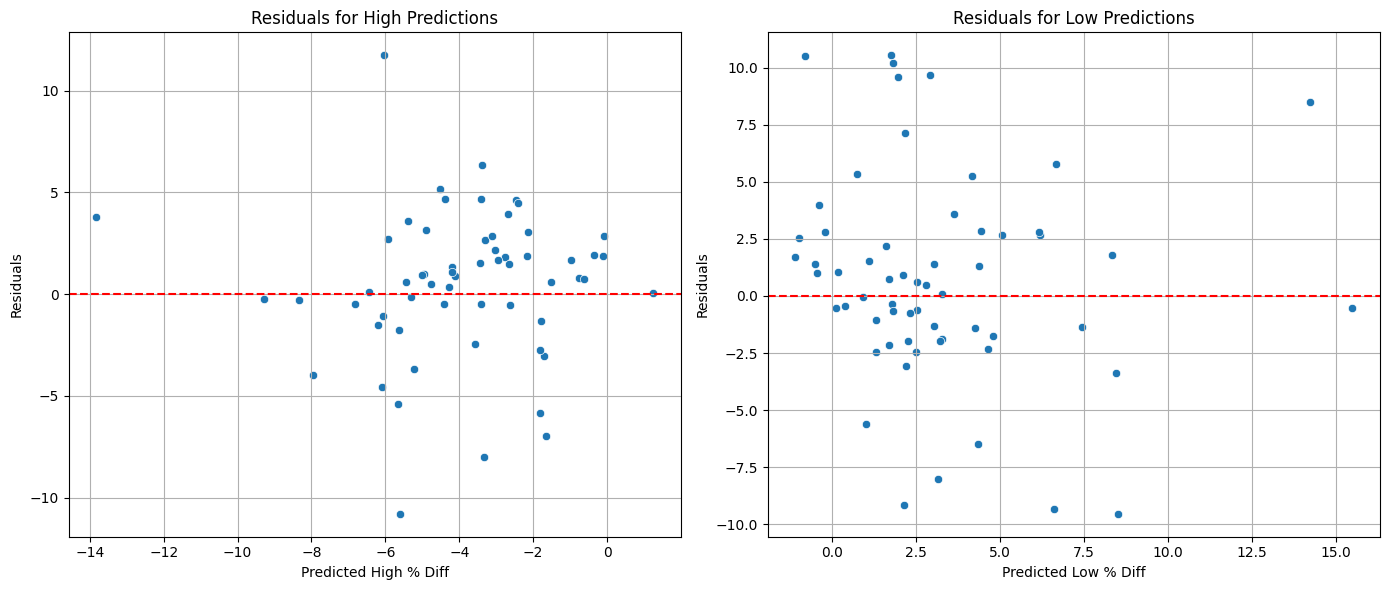

In [ ]:
# Calculate residuals
residuals_high = y_test_high - y_pred_high
residuals_low = y_test_low - y_pred_low

plt.figure(figsize=(14, 6))

# Residuals for High Predictions
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_pred_high, y=residuals_high)
plt.axhline(0, color='r', linestyle='--')
plt.title('Residuals for High Predictions')
plt.xlabel('Predicted High % Diff')
plt.ylabel('Residuals')
plt.grid()

# Residuals for Low Predictions
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_pred_low, y=residuals_low)
plt.axhline(0, color='r', linestyle='--')
plt.title('Residuals for Low Predictions')
plt.xlabel('Predicted Low % Diff')
plt.ylabel('Residuals')
plt.grid()

plt.tight_layout()
plt.show()
